# Chapter 07. 선형회귀의 기초
## 06. 코드로 선형회귀 구현하기
- 경사하강법을 선형회귀로 구현하기

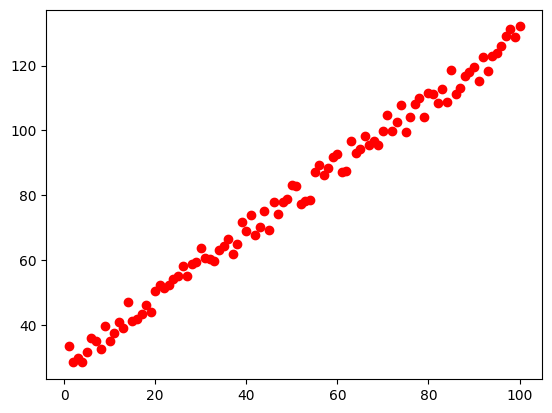

In [6]:
# 코드 작성
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints, bias, variance) :
    x = np.zeros(shape= (numPoints, 2))
    y = np.zeros(shape= numPoints)

    for i in range(0, numPoints) :
        x[i][0] = 1 # 데이터 x의 상수항에는 1
        x[i][1] = i # 데이터 x 값은 1씩 증가시킴
        y[i] = (i + bias) + random.uniform(0, 1) * variance
        # 데이터 y에 bias 생성
    return x, y

x, y = gen_data(100, 25, 10)    # 100개의 데이터 생성

plt.plot(x[:, 1] + 1, y, "ro")  # 데이터 x와 y의 상관관계 그래프 작성
plt.show()

In [8]:
# 생성된 데이터에 경사하강법 적용
def gradient_descent(x, y, theta, alpha, m, numIterations) :
    xTrans = x.transpose()  # 6 : x 값의 transpose 함수를 생성
    theta_list = []         # 7 : theta 값의 저장 리스트 생성
    cost_list = []          # 8 : cost 값의 저장 리스트 생성
    
    for i in range(0, numIterations) :      # 9 : 반복 횟수만큼 반복이 시작
        hypothesis = np.dot(x, theta)       # 10 : \hat{y}의 값 계산, 100개의 데이터에 대한 예측값이 생성됨
        loss = hypothesis - y               # 11 : 예측값과 실제값 간의 차이를 loss에 저장
        cost = np.sum(loss ** 2) / (2 * m)  # 12 : 비용함수의 값을 산출
        gradient = np.dot(xTrans, loss) / m 
        # 13 : 비용함수의 편미분식에 해당하는 값 계산, 경사값은 피쳐의 개수만큼 값이 생성됨
        theta = theta - alpha * gradient    
        # 14 : 가중치 값인 theta가 업데이트, theta는 가중치 값의 벡터
            # 이 코드에선 두 개의 가중치 w_0, w_1 모두 업데이트됨
        
        if i % 250 == 0 :   # 15 : 매회 250번째마다 theta, cost값이 업데이트되어 저장됨
            theta_list.append(theta)
        cost_list.append(cost)

    return theta, np.array(theta_list), cost_list   # 16 : 결과 return

m, n = np.shape(x)      # 1 : x의 데이터 개수에서 데이터 개수 m, 피쳐 개수 n 추출
numIterations = 5000    # 2 : 반복횟수 저장
alpha = 0.0005          # 3 : 학습률(learning rate) 저장
theta = np.ones(n)      # 4 : 가중치(weight) 값의 초깃값 지정

theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations)   # 5 : 경사함수 호출

- 이제 생성된 theta_list 값과 x값을 연산하여 각 가중치별로 $\hat{y}$ 값을 구하여 실행 결과를 그래프로 출력
    - 학습을 진행하면서 데이터와 맞춰지는(fitting) 것을 볼 수 있음

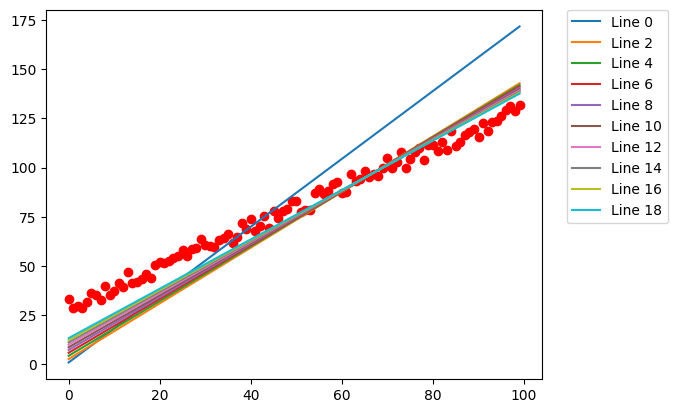

In [10]:
y_predict_step = np.dot(x, theta_list.transpose())
plt.plot(x[:, 1], y, "ro")

for i in range(0, 20, 2) :
    plt.plot(x[:, 1], y_predict_step[:, i], label= 'Line %d' %i)

plt.legend(bbox_to_anchor= (1.05, 1), loc= 2, borderaxespad= 0.)
plt.show()

- 마지막 단계로 생성된 값에 대해 $\hat{y}$값은 1칸 아래 그래프와 같이 됨

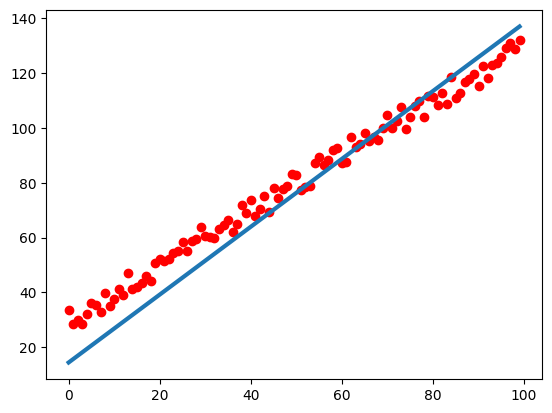

In [12]:
y_predict = np.dot(x, theta)
plt.plot(x[:, 1], y, "ro")
plt.plot(x[:, 1], y_predict, lw= 3)
plt.show()

- 위에 대해 cost값의 변화를 그래프로 작성하면 아래와 같이 됨

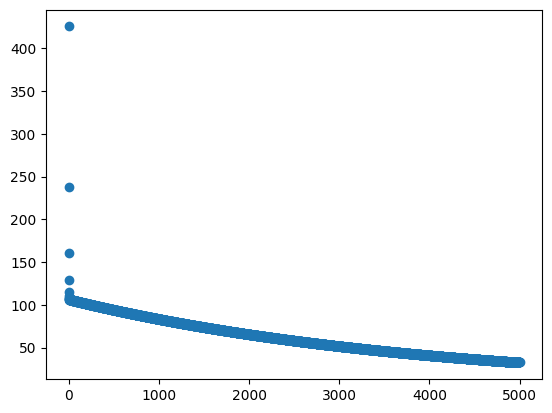

In [13]:
iterations = range(len(cost_list))

plt.scatter(iterations, cost_list)
plt.show()